In [4]:
import pandas as pd
df=pd.read_csv("delivery_time (3).csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df.shape


(21, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867


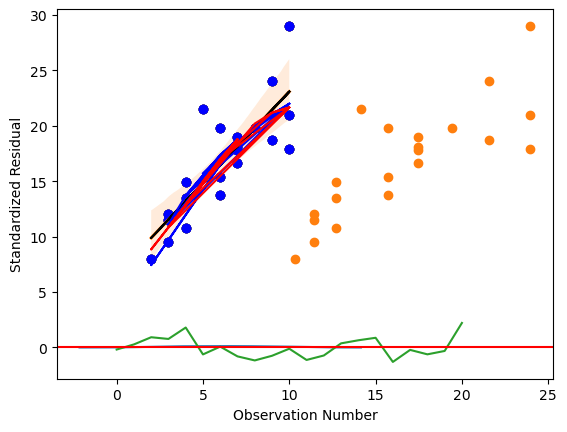

In [9]:
import matplotlib.pyplot as plt
plt.plot(df["Sorting Time"],df["Delivery Time"],"bo")
plt.scatter(x=df['Sorting Time'],y=df['Delivery Time'])
plt.show
df.corr()
df.describe()
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
sns.distplot(df["Sorting Time"])
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])
import statsmodels.formula.api as smf
dataset=df.rename({'Delivery Time':'delivery_time', 
                   'Sorting Time':'sorting_time'},axis=1)
model1=smf.ols("delivery_time~sorting_time",data=dataset).fit()
model1.summary()
model1.params , model1.pvalues
model1.rsquared , model1.resid
pred=model1.predict(dataset["sorting_time"])
model1.resid_pearson
import numpy as np
rmse_lin=np.sqrt(np.mean((np.array(dataset["delivery_time"])-
                          np.array(pred))**2))
plt.scatter(x=dataset['sorting_time'],y=dataset['delivery_time'],
            color='red')
plt.plot(dataset['sorting_time'],pred,color='black')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time') 
model2 = smf.ols("delivery_time~np.log(sorting_time)",data=dataset).fit()
model2.summary()
pred2 = model2.predict(pd.DataFrame(dataset['sorting_time'])) 
rmse_log = np.sqrt(np.mean((np.array(dataset['delivery_time'])-
                            np.array(pred2))**2)) 
pred2.corr(dataset["delivery_time"])
plt.scatter(x=dataset['sorting_time'],y=dataset['delivery_time'],
            color='green')
plt.plot(dataset['sorting_time'],pred2,color='blue')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time') 
model3 = smf.ols("np.log(delivery_time)~sorting_time",data=dataset).fit()
model3.summary()
model3.params
pred_log = model3.predict(pd.DataFrame(dataset['sorting_time']))
pred3=np.exp(pred_log) 
rmse_exp = np.sqrt(np.mean((np.array(dataset['delivery_time'])-
                            np.array(pred3))**2)) 
plt.scatter(x=pred3,y=dataset["delivery_time"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
dataset["sorting_time_sq"]=dataset["sorting_time"]*dataset["sorting_time"]
model3_quad= smf.ols("np.log(delivery_time)~sorting_time+sorting_time_sq",
                 data=dataset).fit()
model3_quad.summary()
model3_quad.params
pred_quad = model3_quad.predict(dataset)
pred4=np.exp(pred_quad)  
rmse_quad = np.sqrt(np.mean((np.array(dataset['delivery_time'])-
                             np.array(pred4))**2))
plt.scatter(dataset["sorting_time"],dataset["delivery_time"],c="b")
plt.plot(dataset["sorting_time"],pred4,"r") 
plt.plot(np.arange(21),model3_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")   
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model1.rsquared,model2.rsquared,
                             model3.rsquared,model3_quad.rsquared])}
table=pd.DataFrame(data)
table 